In [10]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_inputs = 3
n_hidden = 2
n_outputs = n_inputs

In [4]:
learning_rate = 0.01

In [6]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = fully_connected(X, n_hidden, activation_fn=None)
outputs = fully_connected(hidden, n_outputs, activation_fn=None)

In [7]:
reconstructed_loss = tf.reduce_mean(tf.square(outputs - X)) #MSE

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstructed_loss)

In [9]:
init = tf.global_variables_initializer()

In [26]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10,10,100)
x3 = 5 + x1**2 + x2**2 + np.random.randn(100)*20

In [27]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

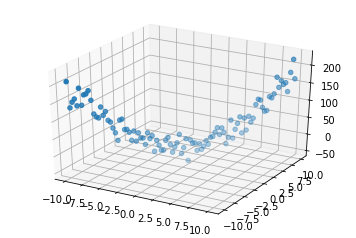

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,x3)

In [32]:
X_train = []
for i, j, k in zip(x1,x2,x3):
    X_train.append(np.array([i,j,k]))

In [34]:
X_train = np.array(X_train)
X_train.shape

(100, 3)

In [38]:
x1_t = np.linspace(-10,10,10)
x2_t = np.linspace(-10,10,10)
x3_t = 5 + x1_t**2 + x2_t**2 + np.random.randn(10)*15

X_test = []
for i,j,k in zip(x1_t, x2_t, x3_t):
    X_test.append(np.array([i,j,k]))
X_test = np.array(X_test)
X_test.shape

(10, 3)

Training autoencoder

In [39]:
n_iterations = 1000
codings = hidden

In [40]:
with tf.Session() as sess:
    init.run()
    for i in range(n_iterations):
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})

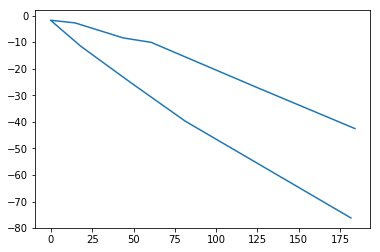

In [42]:
plt.plot(codings_val[:,0], codings_val[:,1])

Stacked Autoencoders

In [54]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [43]:
n_inputs= 28*28
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.001

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
with tf.contrib.framework.arg_scope([fully_connected], activation_fn=tf.nn.elu, weights_initializer=tf.contrib.layers.variance_scaling_initializer(), weights_regularizer=tf.contrib.layers.l2_regularizer(l2_reg)):
    hidden1 = fully_connected(X, n_hidden1)
    hidden2 = fully_connected(hidden1, n_hidden2)
    hidden3 = fully_connected(hidden2, n_hidden3)
    outputs = fully_connected(hidden3, n_outputs, activation_fn=None)

In [44]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) #MSE

In [45]:
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

In [46]:
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [63]:
n_epochs = 1
batch_size = 150
X_test = mnist.test.images[:2]

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        print("Epoch: ", epoch)
        n_batches = mnist.train.num_examples
        for i in range(n_batches):
            if (i%100==0): print('batch: ', i)
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
    
    outputs_val = outputs.eval(feed_dict={X: X_test})

Epoch:  0
batch:  0
batch:  100
batch:  200
batch:  300
batch:  400
batch:  500
batch:  600
batch:  700
batch:  800
batch:  900
batch:  1000
batch:  1100
batch:  1200
batch:  1300
batch:  1400
batch:  1500
batch:  1600
batch:  1700
batch:  1800
batch:  1900
batch:  2000
batch:  2100
batch:  2200
batch:  2300
batch:  2400
batch:  2500
batch:  2600
batch:  2700
batch:  2800
batch:  2900
batch:  3000
batch:  3100
batch:  3200
batch:  3300
batch:  3400
batch:  3500
batch:  3600
batch:  3700
batch:  3800
batch:  3900
batch:  4000
batch:  4100
batch:  4200
batch:  4300
batch:  4400
batch:  4500
batch:  4600
batch:  4700
batch:  4800
batch:  4900
batch:  5000
batch:  5100
batch:  5200
batch:  5300
batch:  5400
batch:  5500
batch:  5600
batch:  5700
batch:  5800
batch:  5900
batch:  6000
batch:  6100
batch:  6200
batch:  6300
batch:  6400
batch:  6500
batch:  6600
batch:  6700
batch:  6800
batch:  6900
batch:  7000
batch:  7100
batch:  7200
batch:  7300
batch:  7400
batch:  7500
batch:  7600
b

In [64]:
def plot_image(image, shape=[28,28]):
    plt.imshow(image.reshape(shape), cmap='Greys', interpolation="nearest")
    plt.axis("off")

In [60]:
# with tf.Session() as sess:
#     init.run()
#     outputs_val = outputs.eval(feed_dict={X: X_test})

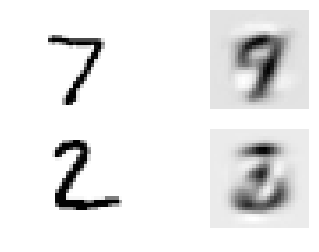

In [65]:

for digit_index in range(2):
    plt.subplot(2,2, digit_index*2+1)
    plot_image(X_test[digit_index])
    plt.subplot(2, 2, digit_index*2 + 2)
    plot_image(outputs_val[digit_index])